In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [58]:
catalog


{'heart_data_raw': 'kedro_datasets.pandas.csv_dataset.CSVDataset(filepath=PurePosixPath("/Users/goncalopacheco/Documents/Master\'s/1º '
                   'Year/2º semester/Machine Learning '
                   'Operations/Project/mlopsproject/data/01_raw/heart_statlog_cleveland_hungary_final.csv"), '
                   "protocol='file', load_args={}, save_args={'index': False})",
 'parameters': "kedro.io.memory_dataset.MemoryDataset(data='<dict>')",
 'params:model_options': "kedro.io.memory_dataset.MemoryDataset(data='<dict>')",
 'params:model_options.test_size': "kedro.io.memory_dataset.MemoryDataset(data='<float>')",
 'params:model_options.random_state': "kedro.io.memory_dataset.MemoryDataset(data='<int>')",
 'params:model_options.features': "kedro.io.memory_dataset.MemoryDataset(data='<list>')"}

In [59]:
# display all columns
pd.set_option('display.max_columns', None)

In [60]:
df = catalog.load('heart_data_raw')

[05/28/25 22:53:58] INFO     Loading data from heart_data_raw (CSVDataset)...                   data_catalog.py:401

## EXPLORATORY DATA ANALYSIS ##

In [61]:
df.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [64]:
df.dtypes


age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [65]:
#Checking unique values of all of the columns
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('-----------------------------')

age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
-----------------------------
sex
[1 0]
-----------------------------
chest pain type
[2 3 4 1]
-----------------------------
resting bp s
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
-----------------------------
cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 22

In [66]:
df.isna().sum()


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [67]:
df['target'].value_counts()


target
1    629
0    561
Name: count, dtype: int64

[05/28/25 22:53:59] WARNING  /Users/goncalopacheco/Documents/Master's/1º Year/2º semester/Machine   ]8;id=362020;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=722793;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py#110\110]8;;\
                             Learning                                                                              
                             Operations/Project/env_1/lib/python3.11/site-packages/seaborn/_oldcore                
                             .py:1119: FutureWarning: use_inf_as_na option is deprecated and will                  
                             be removed in a future version. Convert inf values to NaN before                      
                             operating instead.                                                                    
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

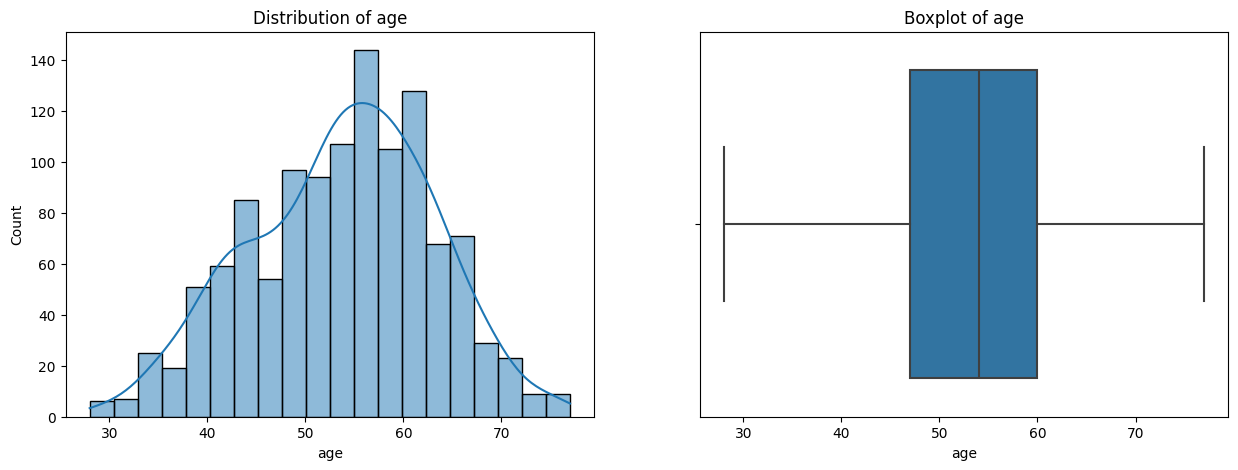

                    WARNING  /Users/goncalopacheco/Documents/Master's/1º Year/2º semester/Machine   ]8;id=918283;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=120489;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py#110\110]8;;\
                             Learning                                                                              
                             Operations/Project/env_1/lib/python3.11/site-packages/seaborn/_oldcore                
                             .py:1119: FutureWarning: use_inf_as_na option is deprecated and will                  
                             be removed in a future version. Convert inf values to NaN before                      
                             operating instead.                                                                    
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

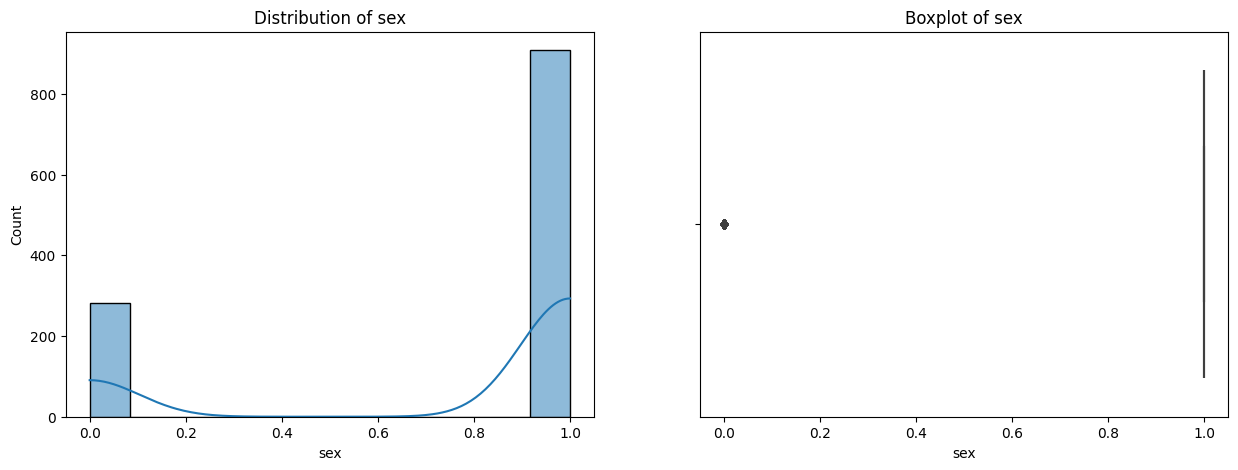

                    WARNING  /Users/goncalopacheco/Documents/Master's/1º Year/2º semester/Machine   ]8;id=586244;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=369403;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py#110\110]8;;\
                             Learning                                                                              
                             Operations/Project/env_1/lib/python3.11/site-packages/seaborn/_oldcore                
                             .py:1119: FutureWarning: use_inf_as_na option is deprecated and will                  
                             be removed in a future version. Convert inf values to NaN before                      
                             operating instead.                                                                    
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

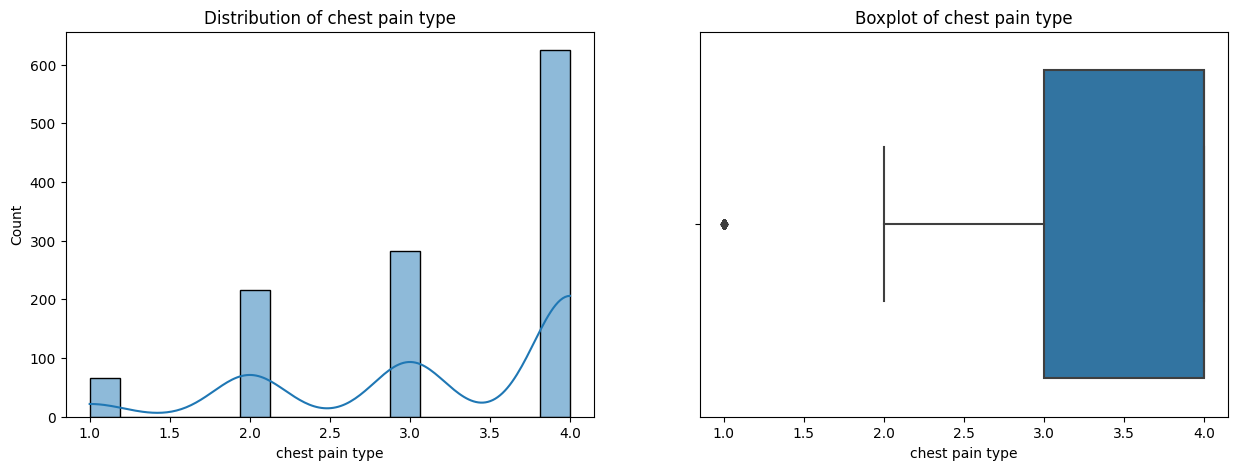

                    WARNING  /Users/goncalopacheco/Documents/Master's/1º Year/2º semester/Machine   ]8;id=279417;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=676256;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py#110\110]8;;\
                             Learning                                                                              
                             Operations/Project/env_1/lib/python3.11/site-packages/seaborn/_oldcore                
                             .py:1119: FutureWarning: use_inf_as_na option is deprecated and will                  
                             be removed in a future version. Convert inf values to NaN before                      
                             operating instead.                                                                    
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

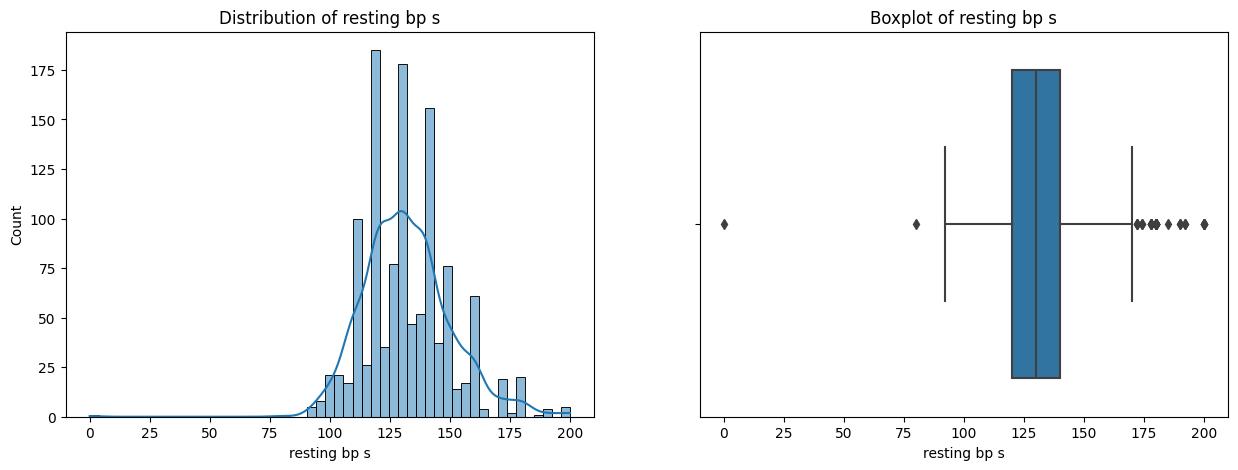

                    WARNING  /Users/goncalopacheco/Documents/Master's/1º Year/2º semester/Machine   ]8;id=62536;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=14351;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py#110\110]8;;\
                             Learning                                                                              
                             Operations/Project/env_1/lib/python3.11/site-packages/seaborn/_oldcore                
                             .py:1119: FutureWarning: use_inf_as_na option is deprecated and will                  
                             be removed in a future version. Convert inf values to NaN before                      
                             operating instead.                                                                    
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

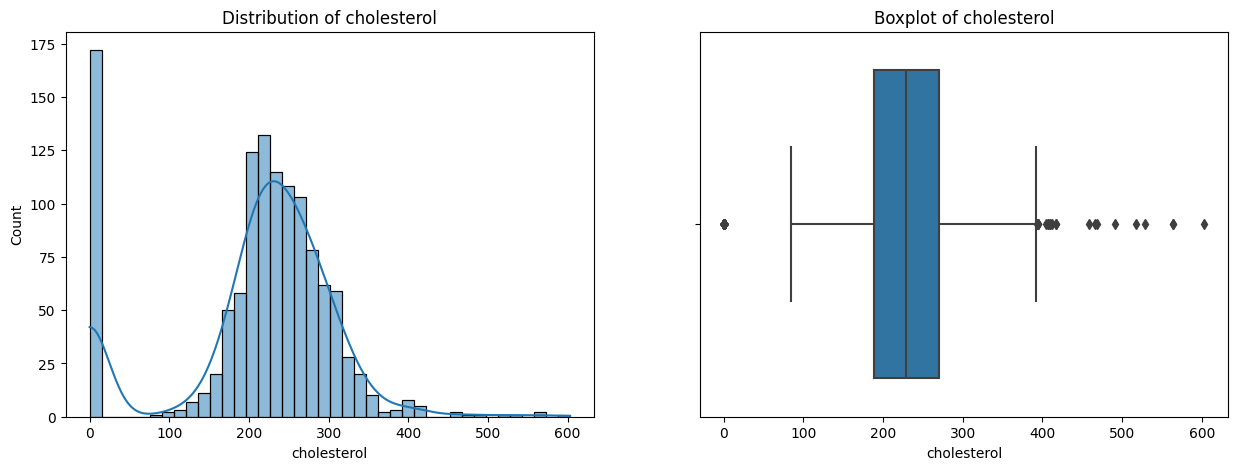

[05/28/25 22:54:00] WARNING  /Users/goncalopacheco/Documents/Master's/1º Year/2º semester/Machine   ]8;id=67101;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=779555;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py#110\110]8;;\
                             Learning                                                                              
                             Operations/Project/env_1/lib/python3.11/site-packages/seaborn/_oldcore                
                             .py:1119: FutureWarning: use_inf_as_na option is deprecated and will                  
                             be removed in a future version. Convert inf values to NaN before                      
                             operating instead.                                                                    
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

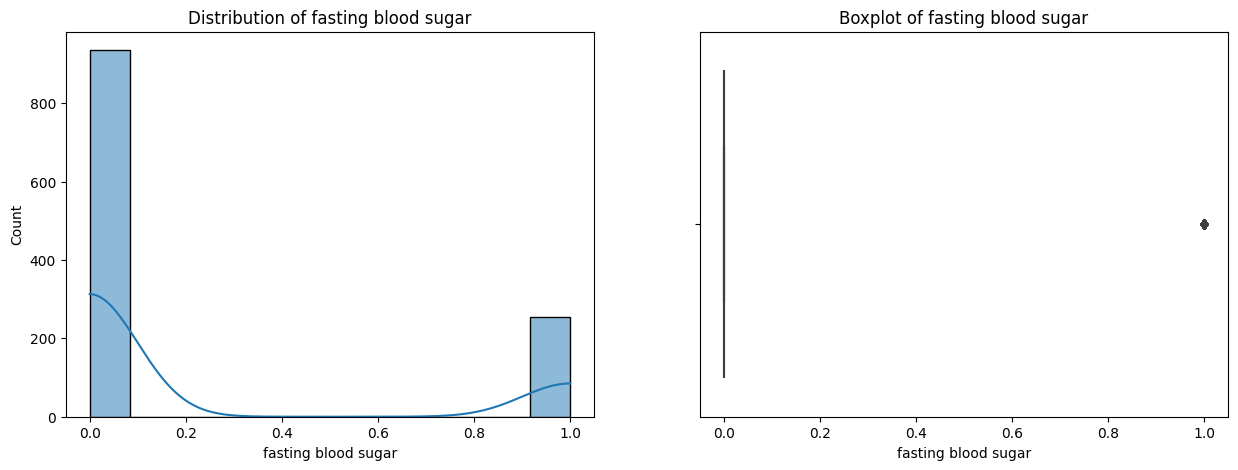

                    WARNING  /Users/goncalopacheco/Documents/Master's/1º Year/2º semester/Machine   ]8;id=120030;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=660334;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py#110\110]8;;\
                             Learning                                                                              
                             Operations/Project/env_1/lib/python3.11/site-packages/seaborn/_oldcore                
                             .py:1119: FutureWarning: use_inf_as_na option is deprecated and will                  
                             be removed in a future version. Convert inf values to NaN before                      
                             operating instead.                                                                    
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

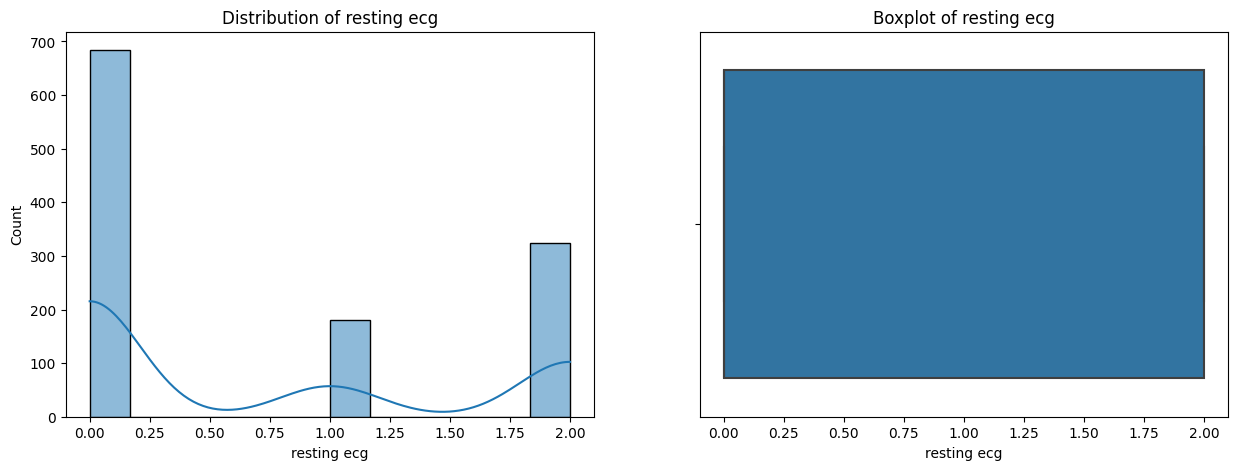

                    WARNING  /Users/goncalopacheco/Documents/Master's/1º Year/2º semester/Machine   ]8;id=717155;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=195228;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py#110\110]8;;\
                             Learning                                                                              
                             Operations/Project/env_1/lib/python3.11/site-packages/seaborn/_oldcore                
                             .py:1119: FutureWarning: use_inf_as_na option is deprecated and will                  
                             be removed in a future version. Convert inf values to NaN before                      
                             operating instead.                                                                    
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

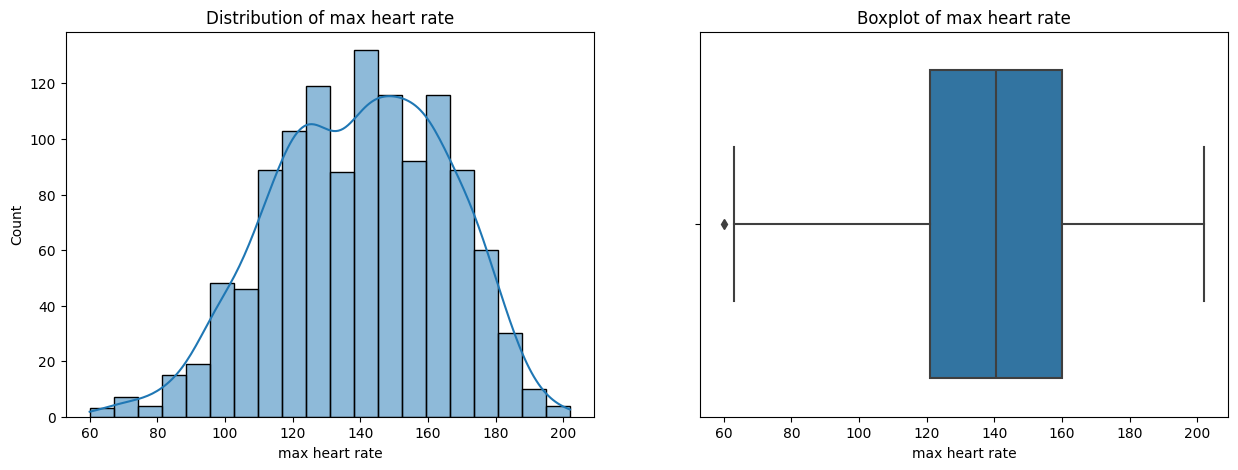

                    WARNING  /Users/goncalopacheco/Documents/Master's/1º Year/2º semester/Machine   ]8;id=926992;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=165378;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py#110\110]8;;\
                             Learning                                                                              
                             Operations/Project/env_1/lib/python3.11/site-packages/seaborn/_oldcore                
                             .py:1119: FutureWarning: use_inf_as_na option is deprecated and will                  
                             be removed in a future version. Convert inf values to NaN before                      
                             operating instead.                                                                    
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

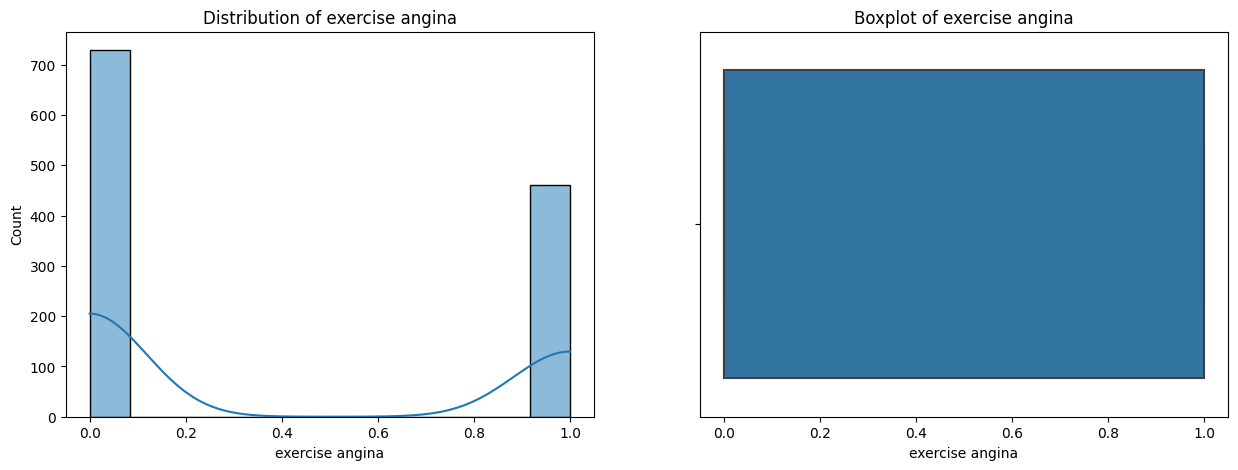

                    WARNING  /Users/goncalopacheco/Documents/Master's/1º Year/2º semester/Machine   ]8;id=446672;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=73005;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py#110\110]8;;\
                             Learning                                                                              
                             Operations/Project/env_1/lib/python3.11/site-packages/seaborn/_oldcore                
                             .py:1119: FutureWarning: use_inf_as_na option is deprecated and will                  
                             be removed in a future version. Convert inf values to NaN before                      
                             operating instead.                                                                    
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

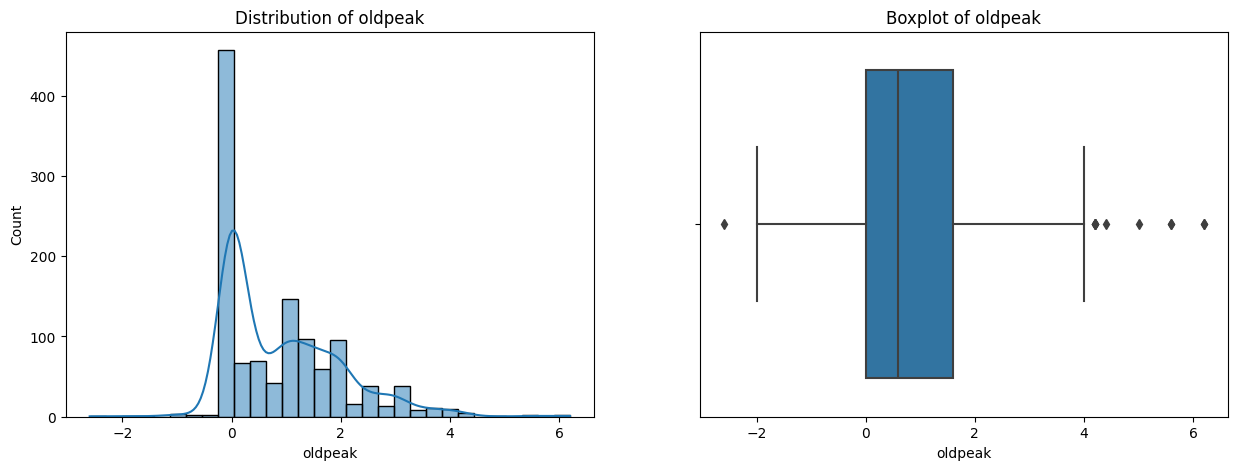

                    WARNING  /Users/goncalopacheco/Documents/Master's/1º Year/2º semester/Machine   ]8;id=75702;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=761068;file:///Users/goncalopacheco/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/warnings.py#110\110]8;;\
                             Learning                                                                              
                             Operations/Project/env_1/lib/python3.11/site-packages/seaborn/_oldcore                
                             .py:1119: FutureWarning: use_inf_as_na option is deprecated and will                  
                             be removed in a future version. Convert inf values to NaN before                      
                             operating instead.                                                                    
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

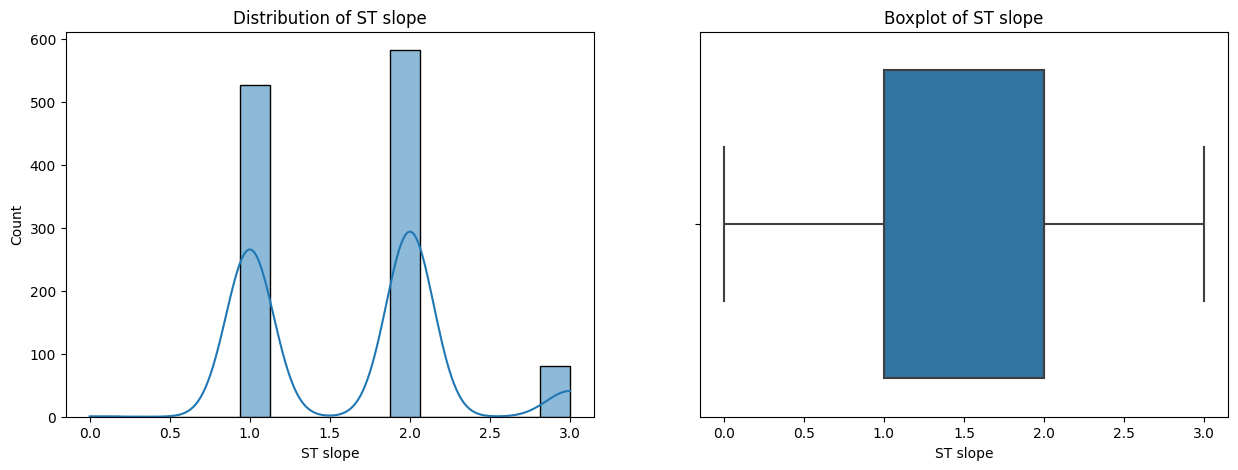

In [68]:
# code from https://www.kaggle.com/code/revypramana/heart-disease-xgboost-96-64
cols = ['age', 'sex', 'chest pain type', 'resting bp s',
    'cholesterol', 'fasting blood sugar', 'resting ecg',
    'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']

for i, column in enumerate(cols, 1):
    plt.figure(figsize=(15, 5))

    # Create histogram on the left side
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')

    # Create boxplot on the right side
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

In [69]:
df.duplicated().sum()

272

In [70]:
df[df.duplicated()]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
163,49,0,2,110,208,0,0,160,0,0.0,1,0
604,58,1,3,150,219,0,1,118,1,0.0,2,1
887,63,1,1,145,233,1,2,150,0,2.3,3,0
888,67,1,4,160,286,0,2,108,1,1.5,2,1
889,67,1,4,120,229,0,2,129,1,2.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


In [71]:
def remove_duplicates(df):
    df = df.drop_duplicates()
    return df

In [72]:
df = remove_duplicates(df)
df.duplicated().sum()

0

In [73]:
df['resting ecg'].value_counts()


resting ecg
0    552
2    188
1    178
Name: count, dtype: int64

In [74]:
df[df['resting bp s'] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
450,55,1,3,0,0,0,0,155,0,1.5,2,1


In [75]:
# Remove the row where the resting bp s is 0 in a function
def remove_zero_bp(df):
    df = df[df['resting bp s'] != 0]
    return df

# Remove the row where the resting bp s is 0
df = remove_zero_bp(df)

In [76]:
# Remove rows where cholesterol is 0
def remove_zero_cholesterol(df):
    df = df[df['cholesterol'] != 0]
    return df

df = remove_zero_cholesterol(df)

In [77]:
# Maximum heart rate should be between 72 and 202

def max_heart_rate_outliers(df):
    df = df[(df['max heart rate'] >= 72) & (df['max heart rate'] <= 202)]
    return df

df = max_heart_rate_outliers(df)

In [78]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [79]:
# Bin the age column

def bin_age(df):
    df['age'] = pd.cut(df['age'], bins=[0, 40, 50, 60, 70, 80, 90], labels=['0-40', '41-50', '51-60', '61-70', '71-80', '81-90'])
    return df

df = bin_age(df)

In [80]:
#bin the cholesterol column into three categories
def bin_cholesterol(df):
    df['cholesterol'] = pd.cut(df['cholesterol'], bins=[0, 200, 240, 1000], labels=['normal', 'borderline high', 'high'])
    return df

df = bin_cholesterol(df)


In [81]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0-40,1,2,140,high,0,0,172,0,0.0,1,0
1,41-50,0,3,160,normal,0,0,156,0,1.0,2,1
2,0-40,1,2,130,high,0,1,98,0,0.0,1,0
3,41-50,0,4,138,borderline high,0,0,108,1,1.5,2,1
4,51-60,1,3,150,normal,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,41-50,1,1,110,high,0,0,132,0,1.2,2,1
1186,61-70,1,4,144,normal,1,0,141,0,3.4,2,1
1187,51-60,1,4,130,normal,0,0,115,1,1.2,2,1
1188,51-60,0,2,130,borderline high,0,2,174,0,0.0,2,1
